# COSC 3570 - Intro to Data Science Project
### FARS Dataset
[Fatality Analysis Reporting System (FARS)](https://www.nhtsa.gov/research-data/fatality-analysis-reporting-system-fars)<br>
[FARS Encyclopedia](https://www-fars.nhtsa.dot.gov/Main/index.aspx)

---

## Setup

In [369]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

sns.set()
sns.set_style("white")

pd.set_option('display.max_columns', 100)

---

## [US Census Demographic Data](https://www.kaggle.com/muonneutrino/us-census-demographic-data)

### Columns
| variable | description |
|---|---|
| CensusId | County Census ID|
| State  | State, DC, or Puerto Rico|
| County |  County or county equivalent|
| TotalPop |  Total population|
| Men |  Number of men|
| Women |  Number of women|
| Hispanic |  % of population that is Hispanic/Latino|
| White |  % of population that is white|
| Black  | % of population that is black|
| Native  | % of population that is Native American/Native Alaskan|
| Asian  | % of population that is Asian|
| Pacific |  % of population that is Native Hawaiian or Pacific Islander|
| Citizen  | Number of citizens|
| Income  | Median household income (\$)|
| IncomeErr  | Median household income error (\$)|
| IncomePerCap  | Income per capita (\$)|
| IncomePerCapErr  | Income per capita error (\$)|
| Poverty |  % under poverty level|
| ChildPoverty  | % of children under poverty level|
| Professional  | % employed in management, business, science, and arts|
| Service | % employed in service jobs|
| Office | % employed in sales and office jobs|
| Construction | % employed in natural resources, construction, and maintenance|
| Production | % employed in production, transportation, and material movement|
| Drive | % commuting alone in a car, van, or truck|
| Carpool | % carpooling in a car, van, or truck|
| Transit | % commuting on public transportation|
| Walk | % walking to work|
| OtherTransp | % commuting via other means|
| WorkAtHome | % working at home|
| MeanCommute | Mean commute time (minutes)|
| Employed | Number of employed (16+)|
| PrivateWork | % employed in private industry|
| PublicWork | % employed in public jobs|
| SelfEmployed | % self-employed|
| FamilyWork | % in unpaid family work|
| Unemployment | Unemployment rate (%)|

TotalPop, Men, Women, Citizen, Employed are all sum columns

The rest are percentages and must be scaled based on county population to aggregate

### combine county data into state data

In [370]:
county = pd.read_csv('acs2015_county_data.csv')

# remove non-states
county = county[~county['State'].isin(['District of Columbia','Puerto Rico'])]

# remove unnecesary columns
county.drop(['CensusId','County'],inplace=True,axis=1)

# add state population to df
county_sum = county.groupby('State').sum()
county['StatePop'] = np.nan
for i, state in enumerate(county.State):
    county.at[i,'StatePop'] = county_sum.at[state,'TotalPop']

# add percent of state population the county is
county['CountyPopPercent'] = county.TotalPop / county.StatePop
county.dropna(inplace=True)

# combine counties into states
# for columns that are percentages/means, compute weighted average per state based on county to state population ratio
# based on https://stackoverflow.com/a/33054358
states = county_sum.copy()
for column in county:
    if column not in ['State','TotalPop', 'Men', 'Women', 'Citizen', 'Employed']:
        states[column] = county.groupby('State').apply(lambda x: np.average(x[column], weights=x.CountyPopPercent))

states.drop(['StatePop', 'CountyPopPercent'], inplace=True, axis=1)

print('states shape:',states.shape)
states.head()

states shape: (50, 34)


,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,4830620,2341093,2489527,3.999312,66.341142,26.302823,0.456166,1.228718,0.022674,3620994,44531.621127,1590.884389,24091.518226,710.740760,18.848808,27.294854,32.768917,16.812378,24.041066,10.060592,16.312141,85.423537,9.245190,0.407581,1.121334,1.041544,2.743344,24.458014,2022325,78.223720,16.313379,5.279787,0.187900,9.408101
Alaska,733375,384160,349215,6.527632,62.376392,3.221664,13.416348,5.772953,1.179333,523946,72351.565897,2449.690352,33413.428663,1107.314851,10.175692,13.585294,36.105307,17.567888,22.740321,12.669918,10.931250,66.867358,12.565732,1.569594,8.241295,6.143167,4.622103,19.141818,351108,67.935430,25.585478,6.296244,0.185370,8.446448
Arizona,6641928,3299088,3342840,30.338523,56.488653,3.959995,4.002505,2.917963,0.174526,4526594,50406.923807,657.493197,25847.425295,292.281063,18.223002,25.963794,34.743947,20.112820,26.122628,9.370591,9.719180,76.528673,11.100769,2.036389,2.105628,2.724845,5.524897,24.787418,2813406,78.766693,15.162412,5.932036,0.195909,9.092710
Arkansas,2958208,1451913,1506295,6.870799,73.596324,15.436414,0.560054,1.352033,0.224281,2164083,41977.085065,1905.621534,22798.448086,941.873823,19.321147,27.761851,31.574531,17.180325,23.734036,10.863239,16.648776,82.462397,10.870562,0.425381,1.774711,1.256411,3.189731,21.692036,1256081,76.992934,16.455038,6.359778,0.194198,7.814723
California,38421464,19087135,19334329,38.380974,38.725035,5.616552,0.376623,13.515132,0.346866,24280349,63198.081918,701.841616,30318.055748,300.143525,16.294262,21.997280,36.712751,18.880480,23.745724,9.458109,11.217510,73.736197,10.912672,4.913542,2.649466,2.494317,5.275354,27.906003,17246360,77.524942,14.042380,8.274415,0.200954,10.009094


---

## [List of largest cities of U.S. states and territories by population (Wikipedia)](https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population)

In [371]:
cities = pd.read_html('https://en.wikipedia.org/wiki/List_of_largest_cities_of_U.S._states_and_territories_by_population', header=0)[0]

# remove non-states
cities = cities[~cities['Statefederal districtor territory'].isin(['American Samoa', 'District of Columbia', 'Guam', 'Northern Mariana Islands', 'Puerto Rico', 'Virgin Islands (U.S.)'])]

# remove extra columns and rename existing columns
cities = cities.iloc[:,0:4]
cities.columns = ['State', 'State_pop', 'City', 'City_pop']
cities.set_index('State',inplace=True)

cities.head()

,State_pop,City,City_pop
State,,,
Alabama,4817786,Birmingham,212237
Alaska,710231,Anchorage,291826
Arizona,6392017,Phoenix,1445632
Arkansas,2915918,Little Rock,193524
California,37253956,Los Angeles,3792621


---

## [State fatality rates](https://www-fars.nhtsa.dot.gov/States/StatesFatalitiesFatalityRates.aspx)

In [372]:
fatalities = pd.read_html('https://www-fars.nhtsa.dot.gov/States/StatesFatalitiesFatalityRates.aspx', attrs = {'id': 'PageContent_tblStFFRSt'}, header = 1)[0]

# column headers are shifted over when loaded in
# state is in 1994 column so set that column as index and then replace old labels
fcols = fatalities.columns
fatalities.rename(columns = {'1994':'State'}, inplace = True)
fatalities.set_index('State',inplace=True)
fatalities.columns = fcols[:-1]

fatalities.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,"Difference, 1994 - 2016",1994.1,1995.1,1996.1,1997.1,1998.1,1999.1,2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,"Difference, 1994 - 2016.1"
State,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alabama,1083,1114,1146,1192,1071,1138,996,991,1038,1004,1154,1148,1207,1110,969,848,862,895,865,853,820,850,1038,-4%,2.21,2.20,2.23,2.23,1.94,2.03,1.76,1.75,1.80,1.71,1.95,1.92,1.99,1.81,1.63,1.38,1.34,1.38,1.33,1.31,1.25,1.26,1.50,-32%
Alaska,85,87,81,77,70,79,106,89,89,98,101,73,74,82,62,64,56,72,59,51,73,65,84,-1%,2.05,2.11,1.97,1.76,1.55,1.74,2.30,1.89,1.82,1.98,2.02,1.45,1.49,1.59,1.27,1.30,1.17,1.57,1.23,1.05,1.50,1.29,1.60,-22%
Arizona,904,1035,994,951,980,1024,1036,1051,1132,1118,1151,1179,1293,1071,938,806,759,826,821,849,773,897,962,6%,2.33,2.61,2.36,2.19,2.17,2.18,2.11,2.12,2.18,2.07,2.01,1.97,2.07,1.70,1.52,1.31,1.27,1.39,1.37,1.40,1.23,1.38,1.46,-37%
Arkansas,609,631,615,660,625,604,652,611,640,640,703,654,665,649,600,596,571,551,560,498,470,550,545,-11%,2.44,2.37,2.21,2.35,2.20,2.07,2.24,2.08,2.13,2.09,2.22,2.05,2.01,1.96,1.81,1.80,1.70,1.67,1.67,1.49,1.38,1.58,1.52,-38%
California,4232,4192,3989,3688,3494,3559,3753,3956,4088,4224,4120,4333,4240,3995,3434,3090,2720,2816,2966,3107,3102,3387,3623,-14%,1.56,1.52,1.43,1.32,1.20,1.19,1.22,1.27,1.27,1.31,1.25,1.32,1.29,1.22,1.05,0.95,0.84,0.88,0.91,0.94,0.93,1.01,1.07,-31%


---

In [373]:
regions = pd.read_csv('regions.csv')
regions.set_index('State',inplace=True)
regions['South']     = regions.Region.map(lambda x: x=='South').astype(float)
regions['West']      = regions.Region.map(lambda x: x=='West').astype(float)
regions['Northeast'] = regions.Region.map(lambda x: x=='Northeast').astype(float)
regions['Midwest']   = regions.Region.map(lambda x: x=='Midwest').astype(float)
regions.head()

,Region,South,West,Northeast,Midwest
State,,,,,
Alabama,South,1.0,0.0,0.0,0.0
Alaska,West,0.0,1.0,0.0,0.0
Arizona,West,0.0,1.0,0.0,0.0
Arkansas,South,1.0,0.0,0.0,0.0
California,West,0.0,1.0,0.0,0.0


---

## [List of U.S. states and territories by area](https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area)

In [374]:
area = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area', header=1)[0]
area = area.iloc[:,[0,2,5,9]]
area.columns = ['State','TotalArea','LandArea','WaterArea']
area = area[~area['State'].isin(['American Samoa', 'District of Columbia', 'Guam', 'Northern Mariana Islands', 'United States Virgin Islands','Puerto Rico', 'Virgin Islands (U.S.)''United States Virgin Islands','Minor Outlying Islands[3][a]','Contiguous United States','50 states and District of Columbia','All U.S. territory'])]
area.set_index('State',inplace=True)
area['WaterArea'] = area['WaterArea'].astype(float)
print(area.shape)
area.head()

(50, 3)


,TotalArea,LandArea,WaterArea
State,,,
Alaska,665384.04,570640.95,94743.10
Texas,268596.46,261231.71,7364.75
California,163696.32,155779.22,7915.52
Montana,147039.71,145545.80,1493.91
New Mexico,121590.30,121298.15,292.15


---

## Combine dataframes

In [375]:
# add state abbreviations to dataframe
exec(open('us_state_abbrev.py').read())
states['Code'] = states.index.to_series().map(us_state_abbrev)

# combine all df's into master df called df
df = pd.concat([states,cities,fatalities,regions,area],axis=1,sort=True)

# drop non-states
df.drop(['District of Columbia','USA'],inplace=True)

# add some new columns
df['MFRatio'] = df.Men / df.Women
df['PopThousands'] = df.TotalPop / 1000
df['PopMillions'] = df.TotalPop / 1000000

df.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,Citizen,Income,IncomeErr,IncomePerCap,IncomePerCapErr,Poverty,ChildPoverty,Professional,Service,Office,Construction,Production,Drive,Carpool,Transit,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Code,State_pop,City,City_pop,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,"Difference, 1994 - 2016",1994.1,1995.1,1996.1,1997.1,1998.1,1999.1,2000.1,2001.1,2002.1,2003.1,2004.1,2005.1,2006.1,2007.1,2008.1,2009.1,2010.1,2011.1,2012.1,2013.1,2014.1,2015.1,2016.1,"Difference, 1994 - 2016.1",Region,South,West,Northeast,Midwest,TotalArea,LandArea,WaterArea,MFRatio,PopThousands,PopMillions
Alabama,4830620.0,2341093.0,2489527.0,3.999312,66.341142,26.302823,0.456166,1.228718,0.022674,3620994.0,44531.621127,1590.884389,24091.518226,710.740760,18.848808,27.294854,32.768917,16.812378,24.041066,10.060592,16.312141,85.423537,9.245190,0.407581,1.121334,1.041544,2.743344,24.458014,2022325.0,78.223720,16.313379,5.279787,0.187900,9.408101,AL,4817786.0,Birmingham,212237.0,1083,1114,1146,1192,1071,1138,996,991,1038,1004,1154,1148,1207,1110,969,848,862,895,865,853,820,850,1038,-4%,2.21,2.20,2.23,2.23,1.94,2.03,1.76,1.75,1.80,1.71,1.95,1.92,1.99,1.81,1.63,1.38,1.34,1.38,1.33,1.31,1.25,1.26,1.50,-32%,South,1.0,0.0,0.0,0.0,52420.07,50645.33,1774.74,0.940377,4830.620,4.830620
Alaska,733375.0,384160.0,349215.0,6.527632,62.376392,3.221664,13.416348,5.772953,1.179333,523946.0,72351.565897,2449.690352,33413.428663,1107.314851,10.175692,13.585294,36.105307,17.567888,22.740321,12.669918,10.931250,66.867358,12.565732,1.569594,8.241295,6.143167,4.622103,19.141818,351108.0,67.935430,25.585478,6.296244,0.185370,8.446448,AK,710231.0,Anchorage,291826.0,85,87,81,77,70,79,106,89,89,98,101,73,74,82,62,64,56,72,59,51,73,65,84,-1%,2.05,2.11,1.97,1.76,1.55,1.74,2.30,1.89,1.82,1.98,2.02,1.45,1.49,1.59,1.27,1.30,1.17,1.57,1.23,1.05,1.50,1.29,1.60,-22%,West,0.0,1.0,0.0,0.0,665384.04,570640.95,94743.10,1.100067,733.375,0.733375
Arizona,6641928.0,3299088.0,3342840.0,30.338523,56.488653,3.959995,4.002505,2.917963,0.174526,4526594.0,50406.923807,657.493197,25847.425295,292.281063,18.223002,25.963794,34.743947,20.112820,26.122628,9.370591,9.719180,76.528673,11.100769,2.036389,2.105628,2.724845,5.524897,24.787418,2813406.0,78.766693,15.162412,5.932036,0.195909,9.092710,AZ,6392017.0,Phoenix,1445632.0,904,1035,994,951,980,1024,1036,1051,1132,1118,1151,1179,1293,1071,938,806,759,826,821,849,773,897,962,6%,2.33,2.61,2.36,2.19,2.17,2.18,2.11,2.12,2.18,2.07,2.01,1.97,2.07,1.70,1.52,1.31,1.27,1.39,1.37,1.40,1.23,1.38,1.46,-37%,West,0.0,1.0,0.0,0.0,113990.30,113594.08,396.22,0.986912,6641.928,6.641928
Arkansas,2958208.0,1451913.0,1506295.0,6.870799,73.596324,15.436414,0.560054,1.352033,0.224281,2164083.0,41977.085065,1905.621534,22798.448086,941.873823,19.321147,27.761851,31.574531,17.180325,23.734036,10.863239,16.648776,82.462397,10.870562,0.425381,1.774711,1.256411,3.189731,21.692036,1256081.0,76.992934,16.455038,6.359778,0.194198,7.814723,AR,2915918.0,Little Rock,193524.0,609,631,615,660,625,604,652,611,640,640,703,654,665,649,600,596,571,551,560,498,470,550,545,-11%,2.44,2.37,2.21,2.35,2.20,2.07,2.24,2.08,2.13,2.09,2.22,2.05,2.01,1.96,1.81,1.80,1.70,1.67,1.67,1.49,1.38,1.58,1.52,-38%,South,1.0,0.0,0.0,0.0,53178.55,52035.48,1143.07,0.963897,2958.208,2.958208
California,38421464.0,19087135.0,19334329.0,38.380974,38.725035,5.616552,0.376623,13.515132,0.346866,24280349.0,63198.081918,701.841616,30318.055748,300.143525,16.294262,21.997280,36.712751,18.880480,23.745724,9.458109,11.217510,73.736197,10.912672,4.913542,2.649466,2.494317,5.275354,27.906003,17246360.0,77.524942,14.042380,8.274415,0.200954,10.009094,CA,37253956.0,Los Angeles,3792621.0,4232,4192,3989,3688,3494,3559,3753,3956,4088,4224,4120,4333,4240,3995,3434,3090,2720,2816,2966,3107,3102,3387,3623,-14%,1.56,1.52,1.43,1.32,1.20,1.19,1.22,1.27,1

---

# Plotting

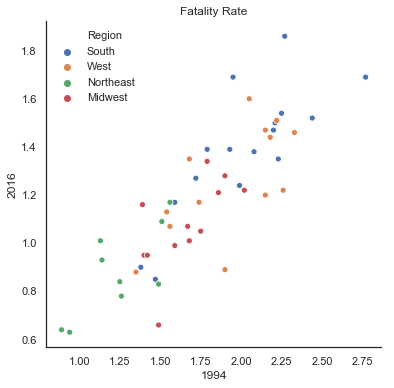

In [376]:
f = plt.figure(figsize=(6,6))
ax = sns.scatterplot(x='1994.1', y='2016.1', data=df, hue='Region')
ax.set(title='Fatality Rate',xlabel='1994', ylabel='2016')
sns.despine()
plt.legend(frameon=False)
plt.savefig('pics/fatality_rate_2016_vs_1994.pdf')
plt.show()

c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


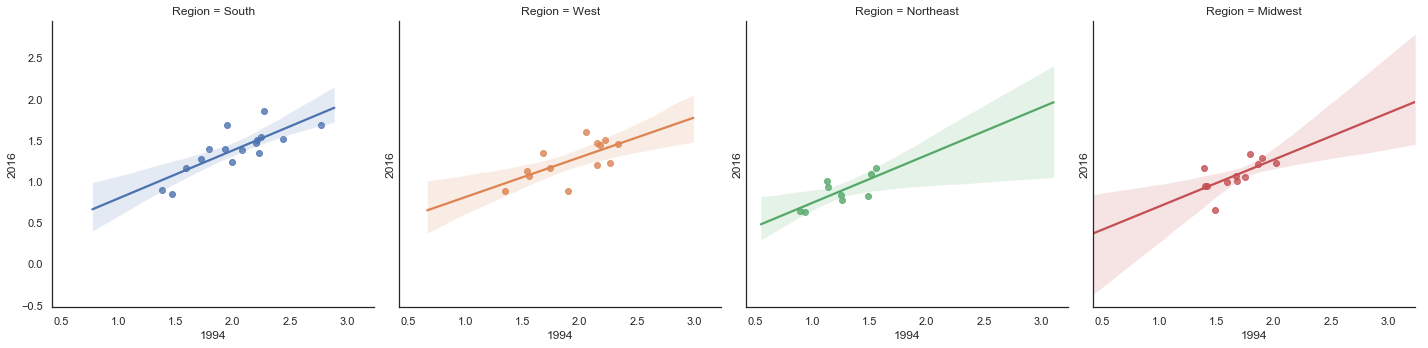

In [377]:
ax = sns.lmplot(x='1994.1', y='2016.1', data=df, hue='Region', col='Region')
ax.set(xlabel='1994', ylabel='2016')
plt.savefig('pics/regions_2016_1994_small_multiples.pdf')

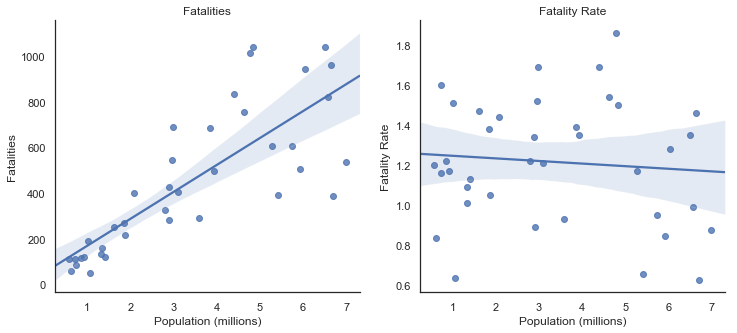

In [378]:
f = plt.figure(figsize=(12,5))
plt.subplot(121)
ax1 = sns.regplot(x='PopMillions', y='2016', data=df[df['TotalPop'] < 8000000])
ax1.set_xlabel('Population (millions)')
ax1.set_ylabel('Fatalities')
ax1.set_title('Fatalities')

plt.subplot(122)
ax2 = sns.regplot(x='PopMillions', y='2016.1', data=df[df['TotalPop'] < 8000000])
ax2.set_xlabel('Population (millions)')
ax2.set_ylabel('Fatality Rate')
ax2.set_title('Fatality Rate')
sns.despine()

plt.savefig('fatality_and_rate_per_population_small_multiple.pdf')
plt.show()

cities = pd.read_html('https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_area', header)

---

## Modeling

In [72]:
import statsmodels.api as sm

In [399]:
cols = ['TotalPop','Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Citizen', 'Income',  'IncomePerCap',
       'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment','City_pop','MFRatio','TotalArea','LandArea','WaterArea']
len(cols)

35

In [433]:
r = []
p = []
prediction = []
models = []
preds = []
param = []
for col in cols:
    X = df[col]
    y = df['2016.1']
    model = sm.OLS(y, X).fit()
    r.append(model.rsquared)
    p.append(model.pvalues[0])
    prediction.append(model.predict(X))
    param.append(model.params[0])

In [430]:
model.params

WaterArea    0.00003
dtype: float64

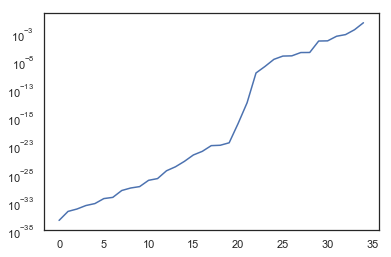

In [401]:
plt.plot(np.sort(p))
plt.yscale('log')
plt.show()

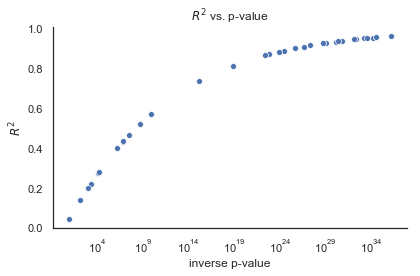

In [402]:
sns.scatterplot([1/pp for pp in p],r)
sns.despine()
plt.xscale('log')
plt.ylabel('$R^2$')
plt.xlabel('inverse p-value')
plt.title('$R^2$ vs. p-value')
plt.tight_layout()
plt.savefig('pics/r2p-value.pdf')
plt.show()

In [403]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [452]:
X = df[cols]
X01 = min_max_scaler.fit_transform(X)
y = df['2016.1']
all_model = sm.OLS(y, X01).fit()
predictions_all = all_model.predict(X01)
print('r2 =',all_model.rsquared)
all_model.summary()

r2 = 0.9948700528949657


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 2016.1   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     83.11
Date:                Sat, 15 Dec 2018   Prob (F-statistic):           3.21e-12
Time:                        22:45:52   Log-Likelihood:                 50.835
No. Observations:                  50   AIC:                            -31.67
Df Residuals:                      15   BIC:                             35.25
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0299      9.663      0.210      0.836     -18.567      22.627
x2            -2.3320      2.302     -1.013      0.327      -7.238       2.574
x3            -4.3949      3.784     -1.162      0.264     -12.460       3.670
x4            -1.7851      1.894     -0.943      0.361      -5.821       2.251
x5            -1.0181      1.008     -1.010      0.329      -3.167       1.131
x6            -4.5695      3.064     -1.491      0.157     -11.100       1.961
x7             1.0322      1.851      0.558      0.585      -2.914       4.978
x8             5.3768      4.470      1.203      0.248      -4.150      14.904
x9            -1.8469      1.183     -1.562      0.139      -4.368       0.674
x10            0.4998      0.689      0.725      0.480      -0.969       1.969
x11            0.5846      1.412      0.414      0.685      -2.424       3.593
x12           -1.3471      1.371     -0.982      0.342      -4.270       1.576
x13           69.8198     37.454      1.864      0.082     -10.011     149.650
x14           49.8763     27.141      1.838      0.086      -7.973     107.725
x15           25.0952     13.569      1.849      0.084      -3.827      54.017
x16           37.9285     20.511      1.849      0.084      -5.790      81.647
x17           45.4404     24.547      1.851      0.084      -6.881      97.762
x18          116.0008     55.116      2.105      0.053      -1.476     233.478
x19           25.9408     12.637      2.053      0.058      -0.995      52.877
x20          100.0830     47.580      2.103      0.053      -1.331     201.497
x21           25.5769     12.274      2.084      0.055      -0.584      51.738
x22           18.3339      8.716      2.103      0.053      -0.244      36.912
x23           15.6376      7.556      2.070      0.056      -0.467      31.742
x24            0.6640      0.456      1.456      0.166      -0.308       1.636
x25           -7.8730      9.487     -0.830      0.420     -28.094      12.348
x26          -27.0558     22.234     -1.217      0.242     -74.446      20.334
x27          -24.0811     20.027     -1.202      0.248     -66.767      18.605
x28           -8.6483      7.520     -1.150      0.268     -24.676       7.380
x29           -0.7225      0.678     -1.066      0.303      -2.167       0.722
x30            0.1741      0.411      0.424      0.678      -0.702       1.051
x31           -0.5758      0.855     -0.673      0.511      -2.399       1.247
x32            0.4538      0.698      0.650      0.525      -1.034       1.942
x33         3.709e+05   1.51e+05      2.453      0.027    4.86e+04    6.93e+05
x34        -3.182e+05    1.3e+05     -2.453      0.027   -5.95e+05   -4.17e+04
x35        -5.283e+04   2.15e+04     -2.453      0.027   -9.87e+04   -6921.420
==============================================================================
Om

In [453]:
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.linear_model import LinearRegression
loo = LeaveOneOut()
regr = LinearRegression()
scores = cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=loo)
print(-scores.mean())

4.882359507992408


In [454]:
error = []
for col in cols:
    X = df[col]
    X = np.reshape(X.values, (50,1))
    y = df['2016.1']
    scores = cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=loo)
    error.append(-scores.mean())

In [455]:
scores

array([-1.08236765e-01, -7.47094284e-01, -8.55881283e-02, -1.23532850e-01,
       -1.64981818e-02, -1.81325449e-05, -6.27126023e-02, -2.04287620e-05,
       -7.21599786e-02, -8.75845858e-03, -3.25620605e-03, -9.06384900e-02,
       -3.00699321e-02, -3.56334010e-02, -1.35165115e-03, -2.87020862e-02,
       -2.76683748e-01, -1.21140044e-01, -9.59687735e-03, -1.14010889e-01,
       -3.16348034e-01, -6.53238387e-02, -2.97194722e-01, -2.74587063e-01,
       -1.13813191e-02, -1.15677345e-01, -1.61814570e-02, -2.10368858e-03,
       -2.81443025e-02, -1.64477490e-01, -7.42198850e-02, -1.38374012e-01,
       -2.82375985e-03, -3.29754449e-04, -5.72011313e-02, -4.75582852e-02,
       -3.02217698e-02, -4.62561897e-05, -2.98686369e-01, -4.84652014e-01,
       -1.96454901e-03, -3.18353242e-02, -3.99566379e-02, -8.81439346e-02,
       -1.16737190e-01, -8.30900980e-02, -9.80652474e-02, -4.46775452e-02,
       -6.85935475e-02, -6.56725767e-04])

In [447]:
d = {'Variable': cols, 'R2': r, 'pval_solo':p,'pval_comb':all_model.pvalues.values,'prediction':prediction, 'error':error, 'param':all_model.params}
df_r = pd.DataFrame(data=d)
df_r.sort_values('R2',ascending=False,inplace=True)
df_r.set_index('Variable',inplace=True)
df_r.head()

,R2,pval_solo,pval_comb,prediction,error,param
Variable,,,,,,
Poverty,0.963606,6.422025e-37,0.684616,Alabama 1.489069 Alaska 0...,0.053288,0.584626
Construction,0.957672,2.606556e-35,0.084240,Alabama 1.212132 Alaska 1...,0.066331,37.928485
ChildPoverty,0.955936,6.982709e-35,0.341508,Alabama 1.551378 Alaska 0...,0.056923,-1.347129
Carpool,0.953281,2.932075e-34,0.057977,Alabama 1.128018 Alaska 1...,0.076346,25.940754
Drive,0.951732,6.523946e-34,0.052591,Alabama 1.302152 Alaska 1...,0.078261,116.000759


In [448]:
df_r[['R2','error','param']].head(10)

,R2,error,param
Variable,,,
Poverty,0.963606,0.053288,0.584626
Construction,0.957672,0.066331,37.928485
ChildPoverty,0.955936,0.056923,-1.347129
Carpool,0.953281,0.076346,25.940754
Drive,0.951732,0.078261,116.000759
Office,0.947521,0.084735,25.095221
MFRatio,0.946444,0.086940,0.453814
Service,0.939916,0.087070,49.876311
PublicWork,0.937338,0.079073,-24.081100


In [450]:
df_r.sort_values('error',ascending=True,inplace=True)
df_r[['error','R2','param']].head(10)

,error,R2,param
Variable,,,
IncomePerCap,0.049095,0.884211,0.499804
Professional,0.053236,0.910600,69.819755
Poverty,0.053288,0.963606,0.584626
Income,0.053902,0.872604,-1.846940
ChildPoverty,0.056923,0.955936,-1.347129
Construction,0.066331,0.957672,37.928485
Carpool,0.076346,0.953281,25.940754
MeanCommute,0.077103,0.902092,0.663994
PrivateWork,0.077671,0.935848,-27.055774


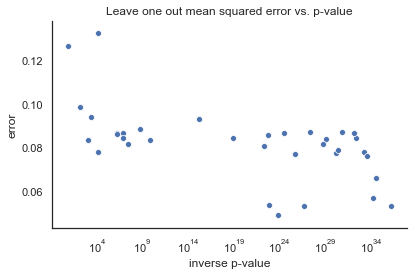

In [411]:
sns.scatterplot([1/pp for pp in p],error)
sns.despine()
plt.xscale('log')
plt.ylabel('error')
plt.xlabel('inverse p-value')
plt.title('Leave one out mean squared error vs. p-value')
plt.tight_layout()
plt.savefig('pics/error-value.pdf')
plt.show()

In [412]:
np.sort(df_r.error)

array([0.04909527, 0.05323565, 0.05328797, 0.05390213, 0.05692295,
       0.06633122, 0.07634629, 0.07710297, 0.07767115, 0.07821376,
       0.07826149, 0.07907345, 0.0809569 , 0.08164269, 0.08177378,
       0.08366959, 0.08377847, 0.08387159, 0.0842919 , 0.0844639 ,
       0.08473495, 0.08572762, 0.08633297, 0.08665654, 0.08671608,
       0.08671861, 0.08694047, 0.08707   , 0.08726157, 0.08858388,
       0.09300616, 0.09397559, 0.09869913, 0.12667975, 0.13240928])

In [413]:
X = df[['Poverty','Construction']]
y = df['2016.1']
model = sm.OLS(y, X).fit()
predictions_pov_cons = model.predict(X)
model.summary();

c:\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


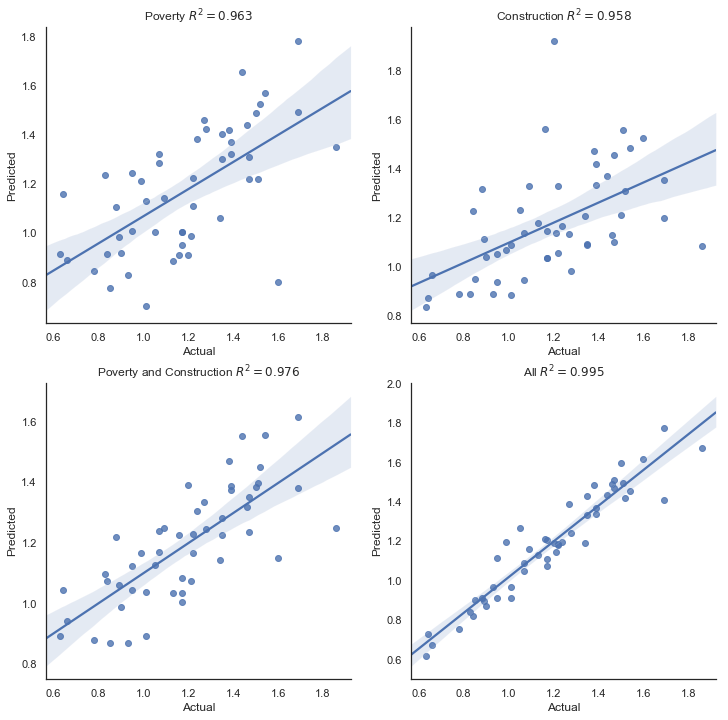

In [414]:
f = plt.figure(figsize=(12,12))
plt.subplot(221)
var = 'Poverty'
ax1 = sns.regplot(df['2016.1'],df_r.prediction[var])
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.set_title(var+' $R^2=0.963$')

plt.subplot(222)
var = 'Construction'
ax2 = sns.regplot(df['2016.1'],df_r.prediction[var])
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax2.set_title(var+' $R^2=0.958$')

plt.subplot(223)
var = 'Poverty and Construction'
ax3 = sns.regplot(df['2016.1'],predictions_pov_cons)
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')
ax3.set_title(var+' $R^2=0.976$')

plt.subplot(224)
var = 'All'
ax4 = sns.regplot(df['2016.1'],predictions_all)
ax4.set_xlabel('Actual')
ax4.set_ylabel('Predicted')
ax4.set_title(var+' $R^2=0.995$')

sns.despine()

plt.savefig('multi_model_predictions.pdf')
plt.show()

In [ ]:
cols = cols.append('All')

In [ ]:
d = {'Variable': cols, 'R^2': r,'prediction':preds}
df_r = pd.DataFrame(data=d)
df_r.sort_values('R^2',ascending=False,inplace=True)
df_r.set_index('Variable',inplace=True)
df_r.head()

---


# Classification

In [250]:
cols = ['TotalPop','Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'Citizen', 'Income',  'IncomePerCap',
       'Poverty', 'ChildPoverty', 'Professional', 'Service',
       'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit',
       'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed',
       'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork',
       'Unemployment','City_pop','MFRatio','TotalArea','LandArea','WaterArea']

In [257]:
df.Region.values.astype('str')

array(['South', 'West', 'West', 'South', 'West', 'West', 'Northeast',
       'South', 'South', 'South', 'West', 'West', 'Midwest', 'Midwest',
       'Midwest', 'Midwest', 'South', 'South', 'Northeast', 'South',
       'Northeast', 'Midwest', 'Midwest', 'South', 'Midwest', 'West',
       'Midwest', 'nan', 'Northeast', 'Northeast', 'West', 'Northeast',
       'South', 'Midwest', 'Midwest', 'South', 'West', 'Northeast',
       'Northeast', 'South', 'Midwest', 'South', 'South', 'West',
       'Northeast', 'South', 'West', 'South', 'Midwest', 'West'],
      dtype='<U9')

In [300]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=100)
X = df.drop(['Code', 'City', 'Difference, 1994 - 2016','Difference, 1994 - 2016.1','Region'],axis=1).values
X = df[cols]
X = min_max_scaler.fit_transform(X)
y = df.Region.values.astype('str')
score = cross_val_score(clf,X,y,cv=5)
print(score.mean())

0.7899999999999999
